In [1]:
import os, logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from helpers import get_ip_address, has_write_permission, SNPDataSet

### Set variables

In [2]:
data_locations = {
    '223.195.111.48': '/project/datacamp/team11/data',
    '147.47.44.229': '/home/jinhyun/data/1kGP',
}

chr_list = [str(x) for x in range(1,23)]
gt_dict = {"0|0" :0, "0|1" : 1, "1|0" : 2, "1|1" : 3 } # genotype dict for converting string-> inteter 

### Validation checks

In [3]:
raw_data_path = data_locations.get(get_ip_address(), '/not_found')
sample_annotation_file = os.path.join(raw_data_path, "igsr-1000 genomes 30x on grch38.tsv")
preprocess_path = os.path.join(raw_data_path, "preprocessed")

assert os.path.exists(preprocess_path), f"Data path not exists: {raw_data_path} OR IP setting is incorrect: {get_ip_address()}"
assert os.path.isfile(sample_annotation_file), f"File not exists : {sample_annotation_file}"
assert has_write_permission(preprocess_path), f"You do not have write permission for {preprocess_path}"

In [4]:
sample_annotation_df = pd.read_csv(sample_annotation_file, sep="\t")
print(f"Read sample annotation info with shape : {sample_annotation_df.shape}")

Read sample annotation info with shape : (3202, 9)


### data analysis and visualization

In [5]:
target_data_file_prefix = os.path.join(preprocess_path, "chr10")

In [6]:
snp_dataset = SNPDataSet.from_file(target_data_file_prefix, sample_annotation_df)

print(f"\ngenotype array shape (#samples, #features) : {snp_dataset.genotype_array.shape}")
print(f"sample annotations (#samples, ) : {snp_dataset.sample_annotation_df.shape}")
print(f"variant info dataframe (#features, ): {snp_dataset.variant_info_df.shape}")

Reading data from files /home/jinhyun/data/1kGP/preprocessed/chr10_matrix.npy and /home/jinhyun/data/1kGP/preprocessed/chr10_variant.csv
Read genotype array of shape (3202, 3044073) and variant info dataframe of shape (3044073, 4)

genotype array shape (#samples, #features) : (3202, 3044073)
sample annotations (#samples, ) : (3202, 9)
variant info dataframe (#features, ): (3044073, 4)


In [7]:
supporting_sample_count = (snp_dataset.genotype_array != 0).sum(axis = 0)

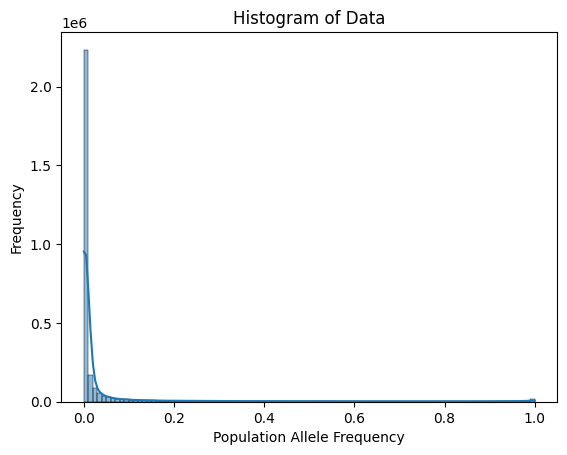

In [8]:
sns.histplot(supporting_sample_count / snp_dataset.genotype_array.shape[0], bins=100, kde=True)  # 'bins' controls the number of bins, 'kde' adds a Kernel Density Estimate plot

#plt.xscale('log')
#plt.xlim(xmin, xmax)

plt.title('Histogram of Data')
plt.xlabel('Population Allele Frequency')
plt.ylabel('Frequency')

plt.show()

In [9]:
supporting_count_filter = supporting_sample_count > 5

In [10]:
print(f"This filter will retain {supporting_count_filter.sum()} /", snp_dataset.genotype_array.shape[1], "variants")

This filter will retain 1534439 / 3044073 variants


In [11]:
snp_dataset.filter_variant(supporting_count_filter)

Filter variant retained 1534439 / 3044073


In [12]:
snp_dataset.save_data(os.path.join(preprocess_path, "chr10_filtered"))

genotype matrix shape (#samples, #features) : (3202, 1534439) -> saved to /home/jinhyun/data/1kGP/preprocessed/chr10_filtered_matrix.npy
variant info dataframe (#features, ): (1534439, 4) -> saved to /home/jinhyun/data/1kGP/preprocessed/chr10_filtered_variant.csv


In [13]:
sample_annotation_df["Superpopulation code"].value_counts()
# sample_annotation["Population name"].value_counts()

Superpopulation code
AFR        893
EUR        632
SAS        601
EAS        585
AMR        490
EUR,AFR      1
Name: count, dtype: int64